In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import seaborn as sns

In [6]:
from math import exp, ceil

In [7]:
%matplotlib inline

In [8]:
class Option:
    def __compute_width(self):
        dt = (ceil(float(365)/self.term_unit))/float(self.term_step_count)
        M = exp(-self.reversion_rate * dt) - 1.0
        jmax = int((-0.184 / M) + 1)
        return 2*jmax+1
    
    def __compute_height(self):
        return int(self.term_step_count * (ceil(float(365)/self.term_unit)) * self.maturity) + 1
    
    def __init__(self, term_unit, maturity, term_step_count, reversion_rate):
        self.term_unit = term_unit
        self.maturity = maturity
        self.term_step_count = term_step_count
        self.reversion_rate = reversion_rate
        self.width = self.__compute_width()
        self.height = self.__compute_height()

In [9]:
def get_row_list_from_string(row):
    return row.replace('[', '').replace(']', '').replace('\n', '').split(',')

def get_options_from_row_list(x):
    maturity = int(float(x[1]))
    term_unit = int(x[3])
    term_step_count = int(x[4])
    reversion_rate = float(x[5])
    return Option(term_unit, maturity, term_step_count, reversion_rate)

def get_options(filename):
    with open(filename , 'r') as f:
        return list(map(get_options_from_row_list, np.array(list(map(get_row_list_from_string, f.readlines()))).T))

In [10]:
def print_jointplots(filenames):
    for f in filenames:
        options = get_options(f)
        op_len = len(options)

        widths = np.array(list(map(lambda o: o.width,options)))
        heights = np.array(list(map(lambda o: o.height,options)))

        h = sns.jointplot(x=widths,
                  y=heights,
                  kind='scatter',
                  size=13,
                  color='red') # bi-variate

        h.set_axis_labels('tree width', 'tree height', fontsize=16)

In [47]:
def print_datainfo(filenames):
    for f in filenames:
        options = get_options(f)
        op_len = len(options)
        widths = np.array(list(map(lambda o: o.width,options)))
        heights = np.array(list(map(lambda o: o.height,options)))
        prods = np.sum(np.array(list(map(lambda o: o.width * o.height,options))))
    
        print('file: ' + f)
        print('total options: ' + str(op_len))
        print('min_width: ' + str(min(widths)))
        print('max_width: ' + str(max(widths)))
        print('min_height: ' + str(min(heights)))
        print('max_height: ' + str(max(heights)))
        print('total width : ' + str(np.sum(widths)))
        print('total height: ' + str(np.sum(heights)))
        print('sum of prods: ' + str(prods))
        print('total width + total height: ' + str(np.sum(widths) + np.sum(heights)))
        print('\n')


/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


file: 0_UNIFORM.in
total options: 65467
min_width: 47
max_width: 47
min_height: 325
max_height: 325
total width : 3076949
total height: 21276775
sum of prods: 1000008425
total width + total height: 24353724


file: 1_RAND.in
total options: 450
min_width: 7
max_width: 1019
min_height: 25
max_height: 8737
total width : 225750
total height: 2002818
sum of prods: 1002528102
total width + total height: 2228568


file: 2_RANDCONSTHEIGHT.in
total options: 17870
min_width: 7
max_width: 1021
min_height: 109
max_height: 109
total width : 9174596
total height: 1947830
sum of prods: 1000030964
total width + total height: 11122426


file: 3_RANDCONSTWIDTH.in
total options: 4922
min_width: 47
max_width: 47
min_height: 13
max_height: 8749
total width : 231334
total height: 21281414
sum of prods: 1000226458
total width + total height: 21512748


file: 4_SKEWED.in
total options: 8554
min_width: 7
max_width: 1019
min_height: 13
max_height: 8737
total width : 1927118
total height: 4262746
sum of prods: 1

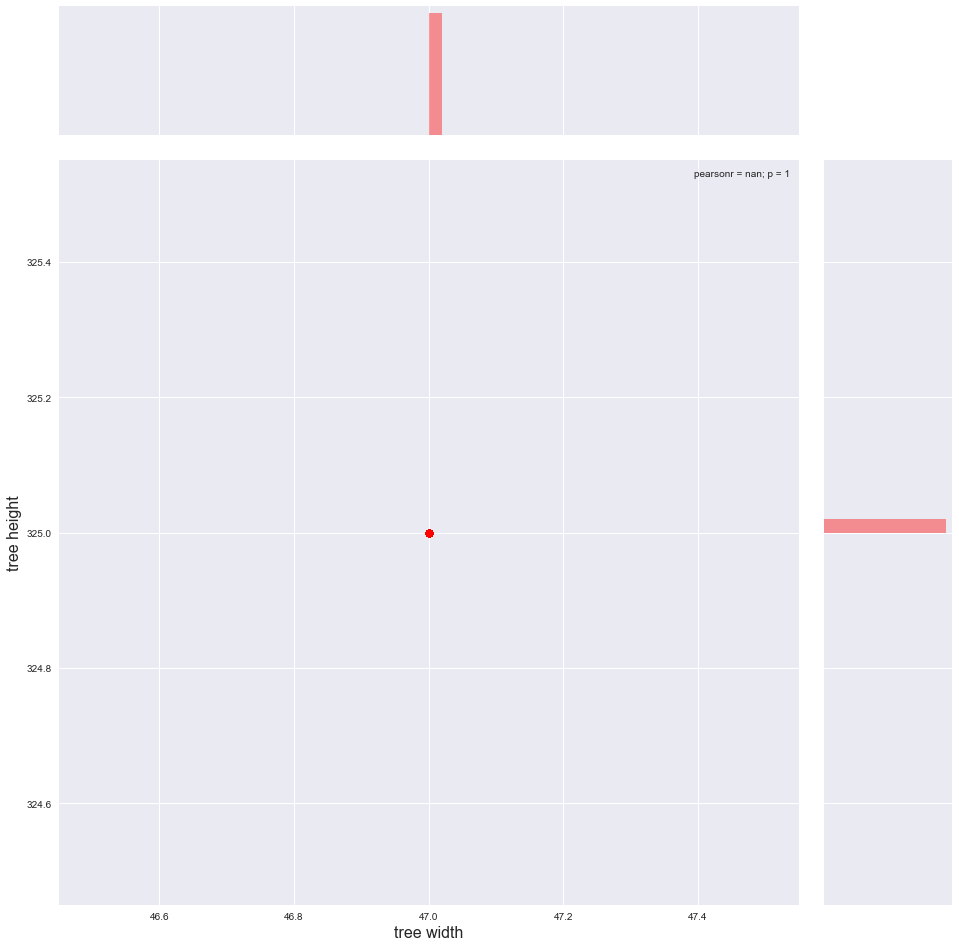

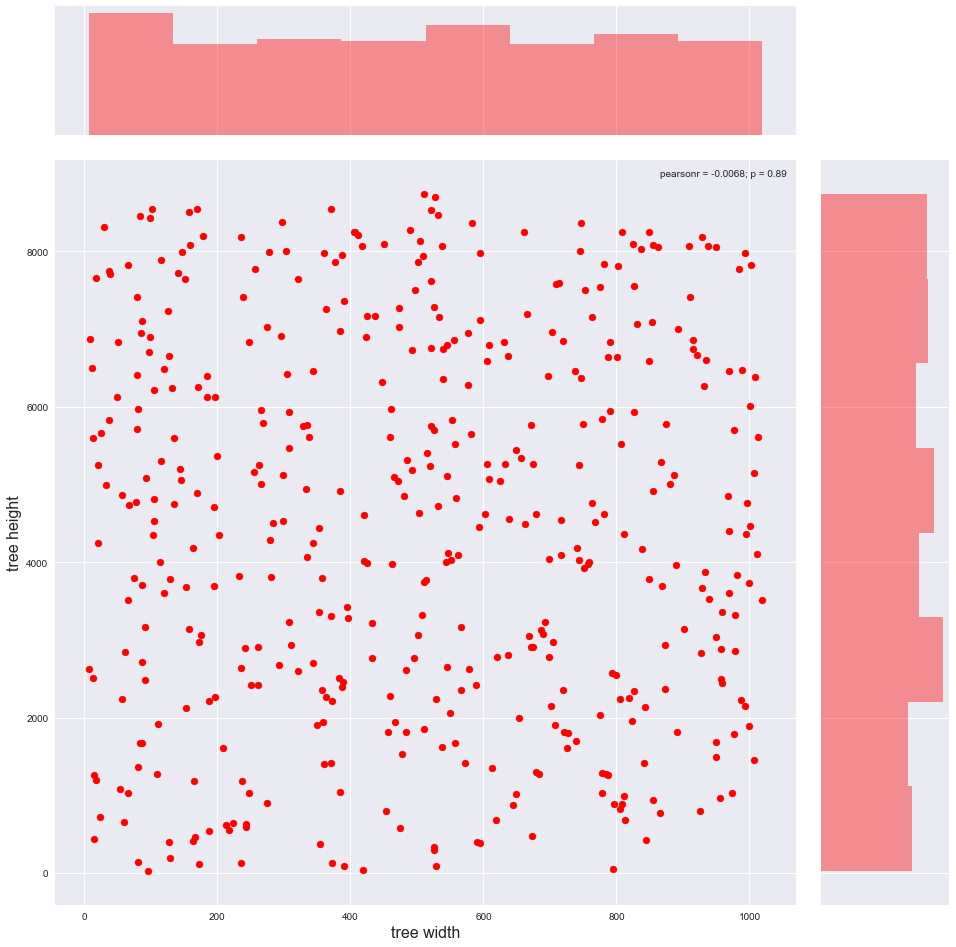

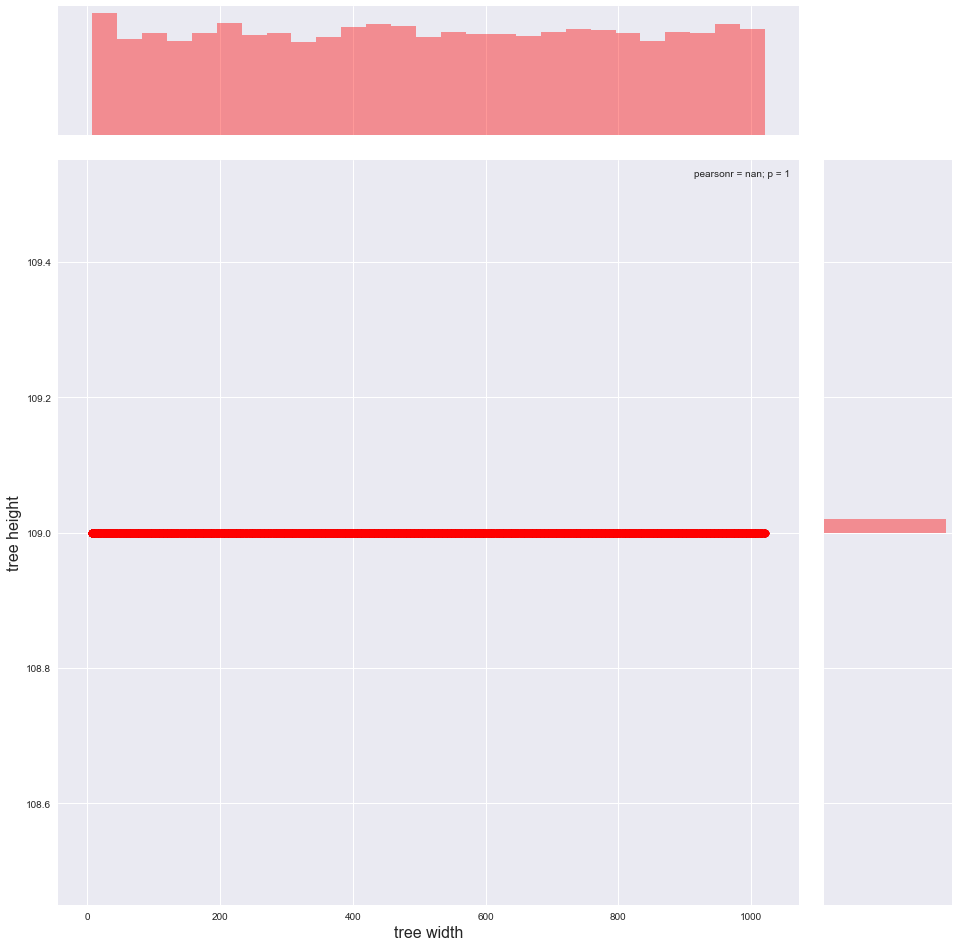

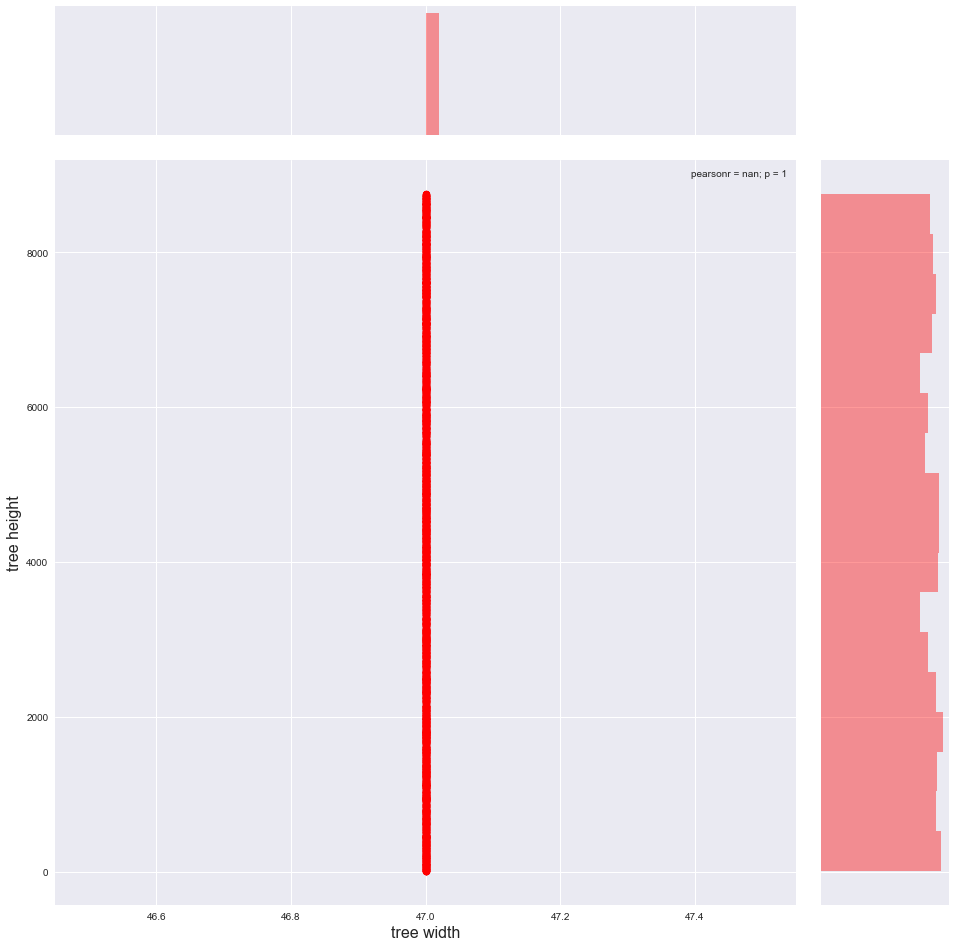

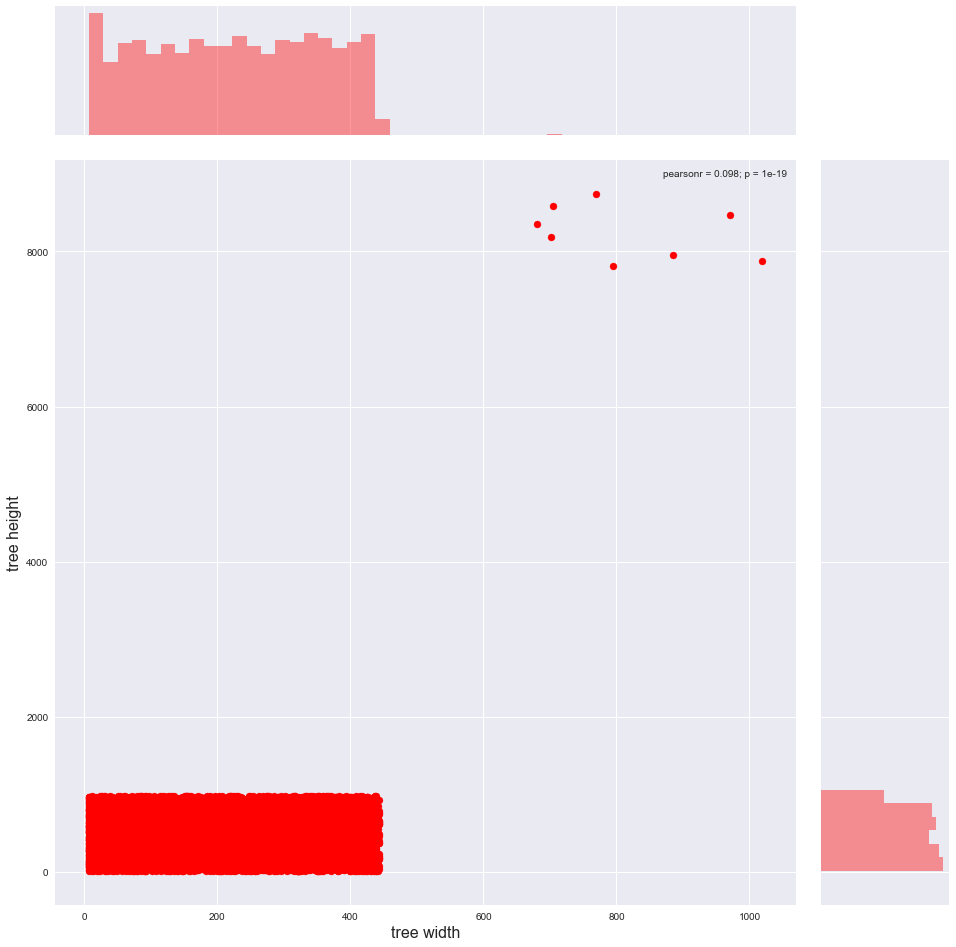

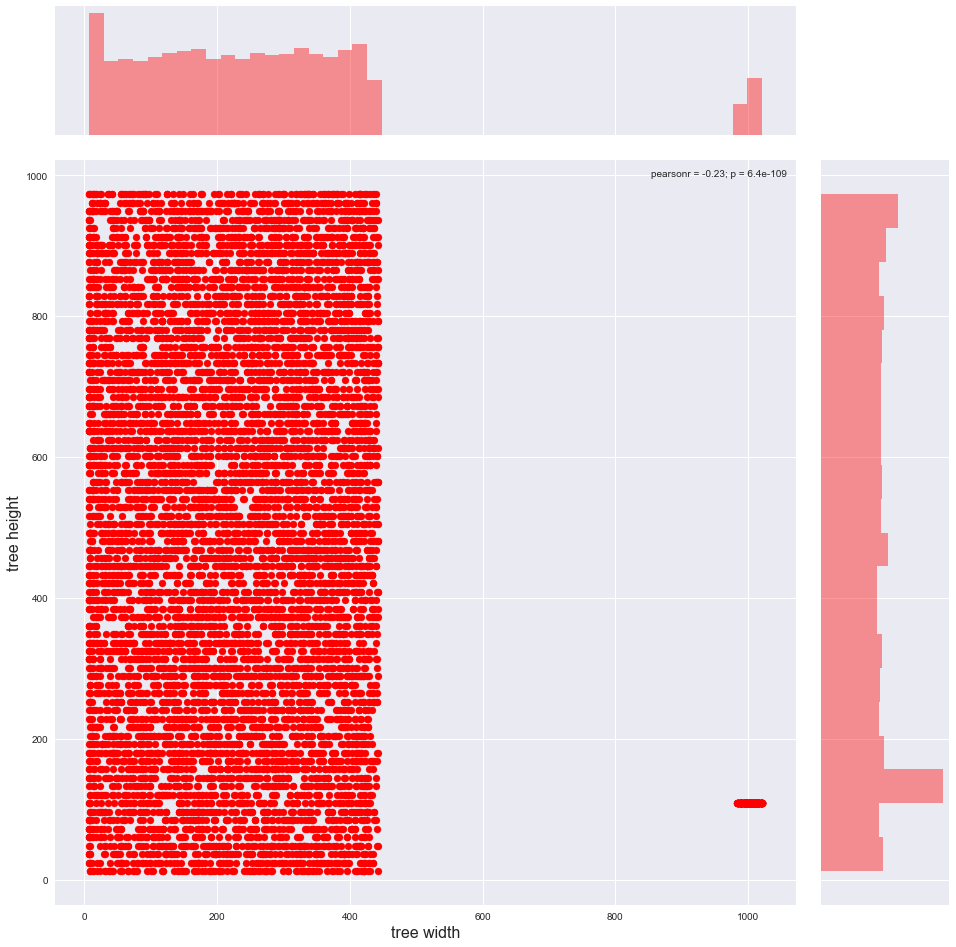

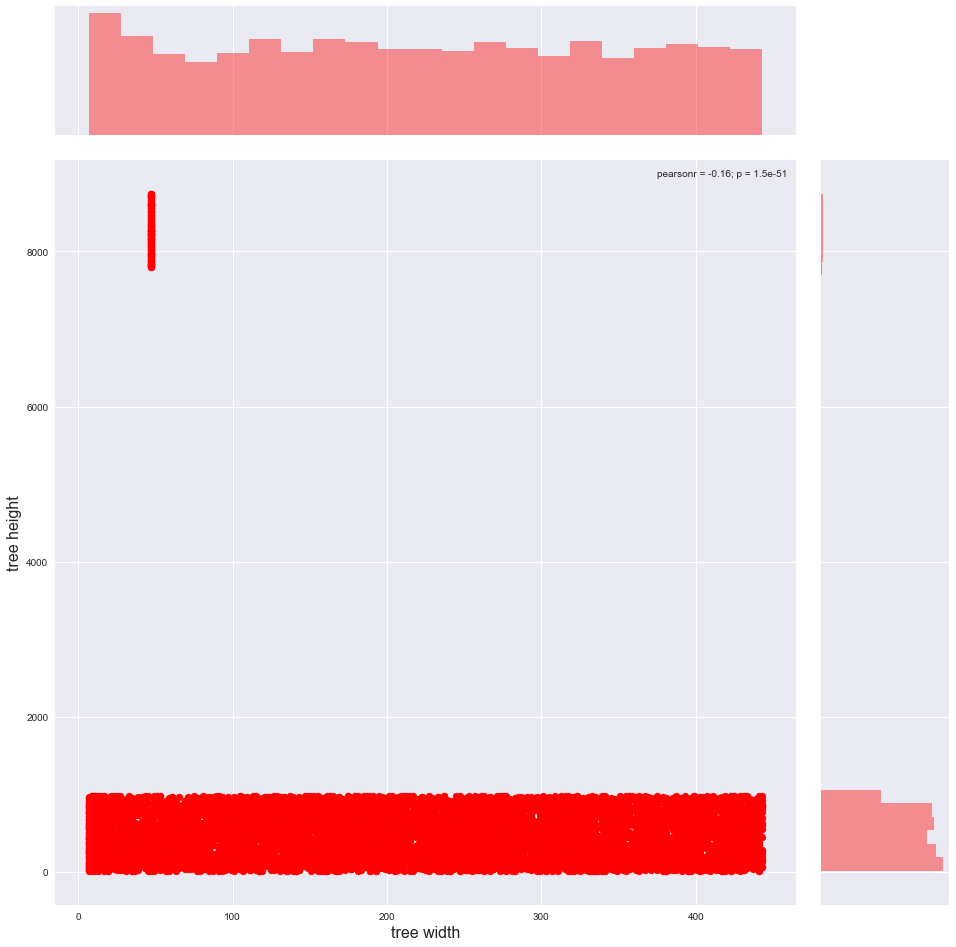

In [49]:
filenames = ["0_UNIFORM.in", "1_RAND.in", "2_RANDCONSTHEIGHT.in", "3_RANDCONSTWIDTH.in", 
             "4_SKEWED.in", "5_SKEWEDCONSTHEIGHT.in", "6_SKEWEDCONSTWIDTH.in"]
print_jointplots(filenames)
print_datainfo(filenames)

file: wmp/data/100000/rand_h_unif_w_100000.in


/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


file: wmp/data/100000/rand_hw_100000.in
file: wmp/data/100000/rand_w_unif_h_100000.in
file: wmp/data/100000/skew_h_1_rand_w_100000.in
file: wmp/data/100000/skew_h_10_rand_w_100000.in
file: wmp/data/100000/skew_hw_1_100000.in
file: wmp/data/100000/skew_hw_10_100000.in
file: wmp/data/100000/skew_w_1_rand_h_100000.in
file: wmp/data/100000/skew_w_10_rand_h_100000.in
file: wmp/data/100000/unif_book_hw_100000.in
file: wmp/data/100000/unif_hw_100000.in


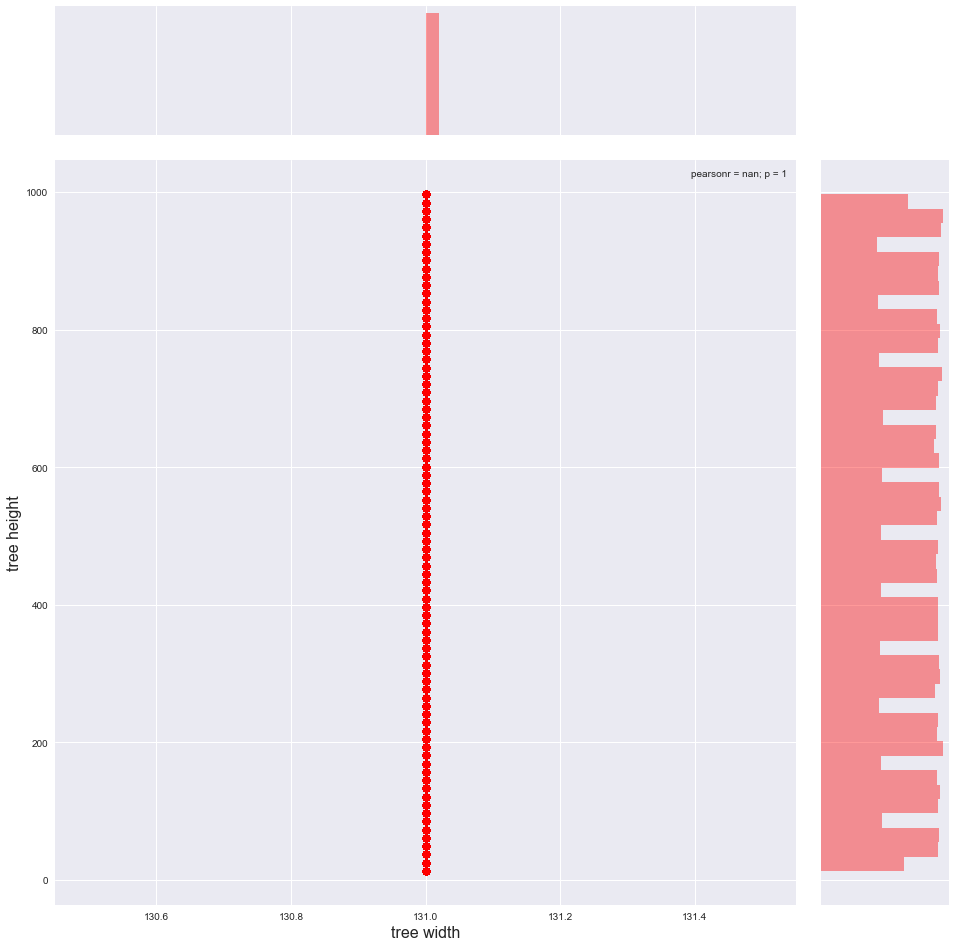

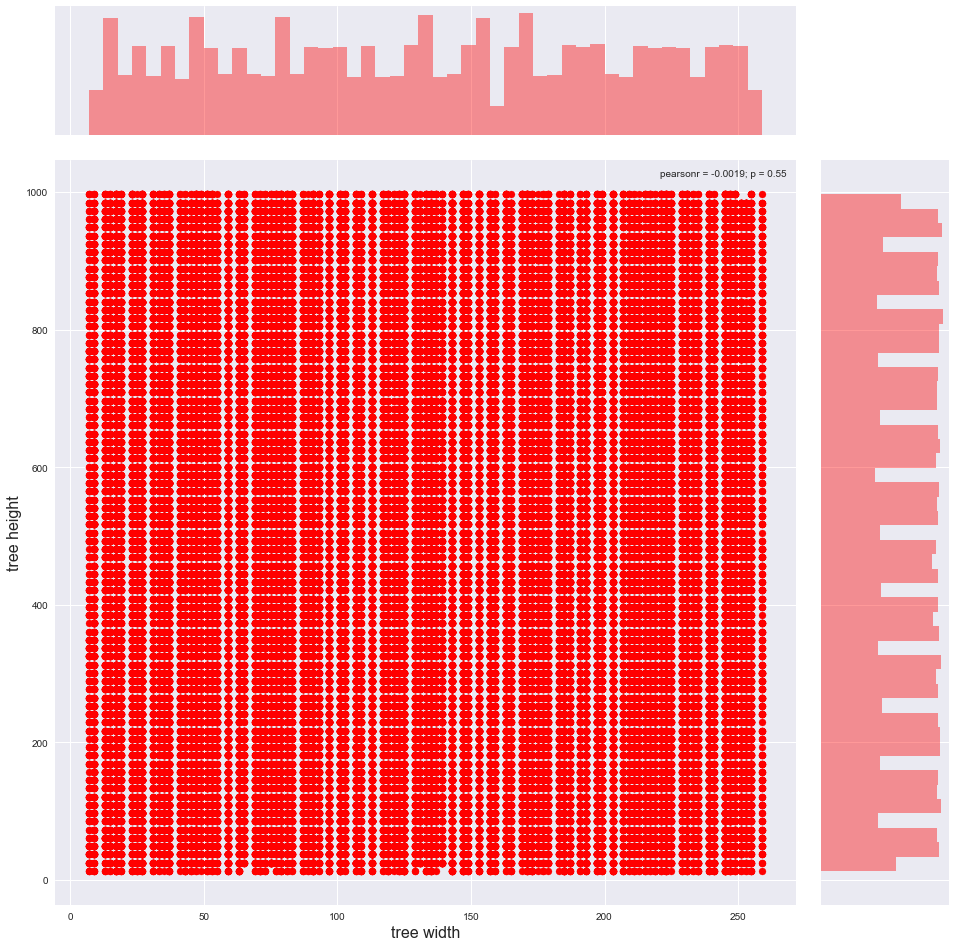

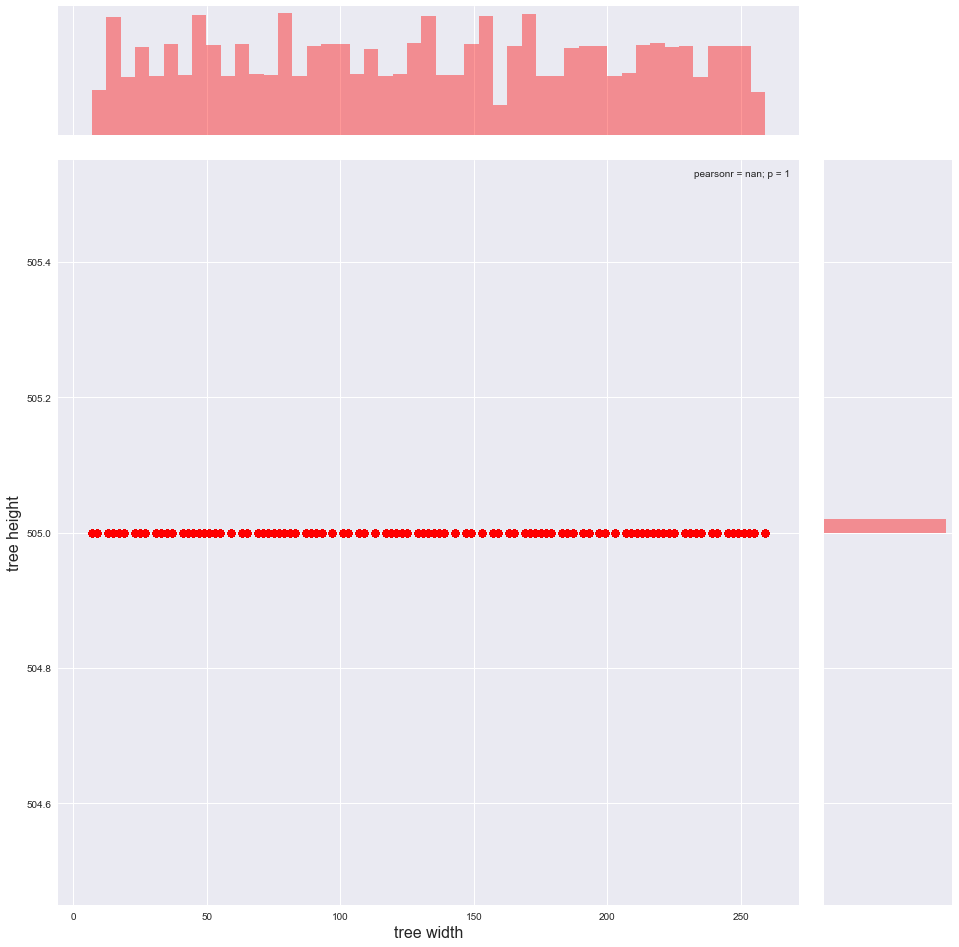

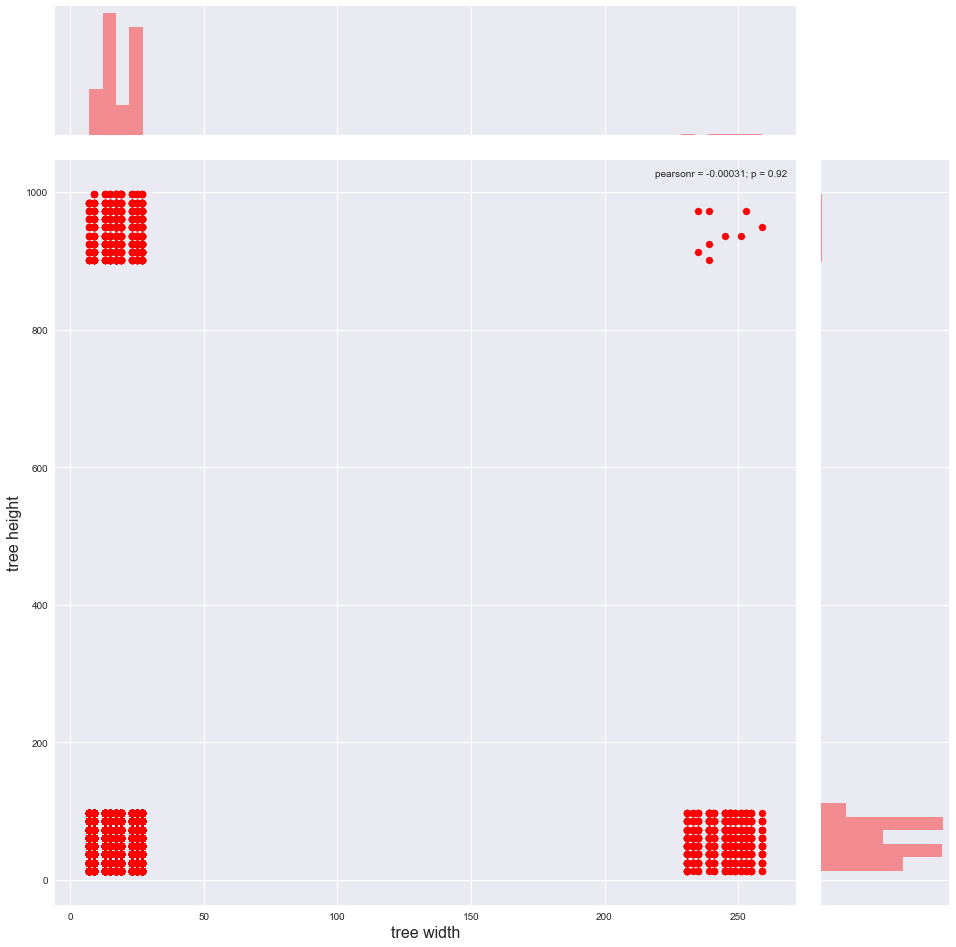

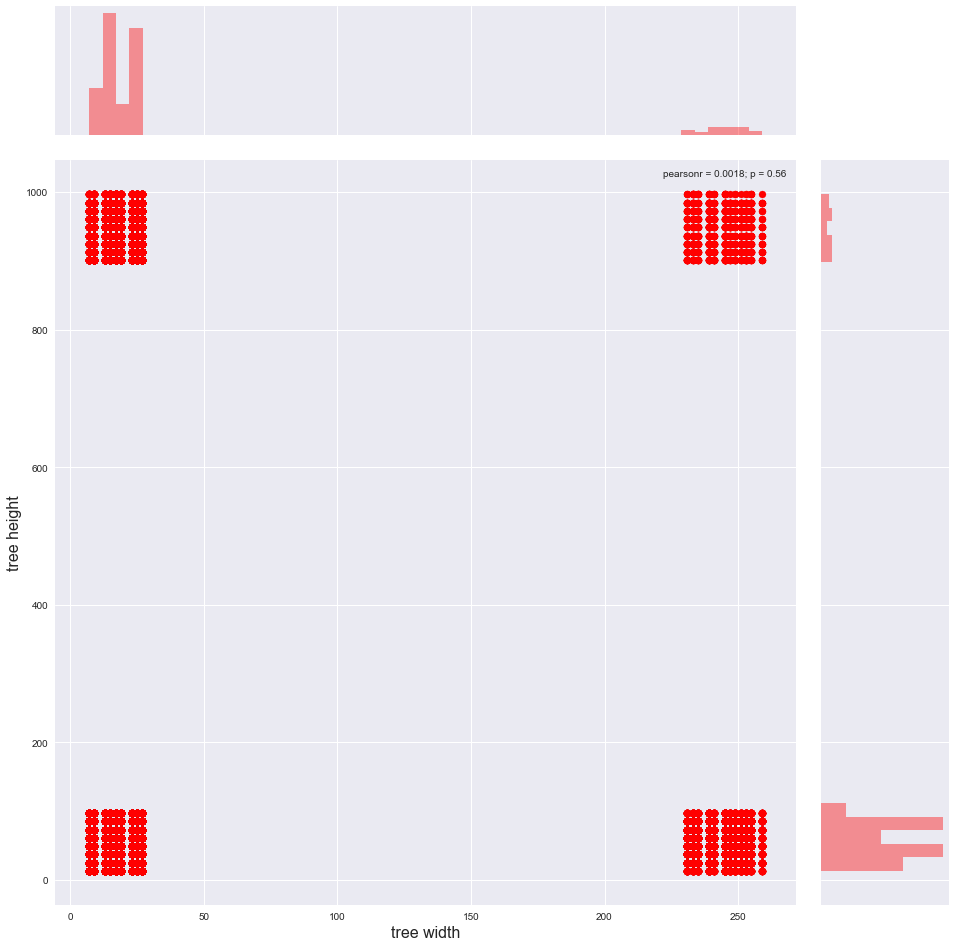

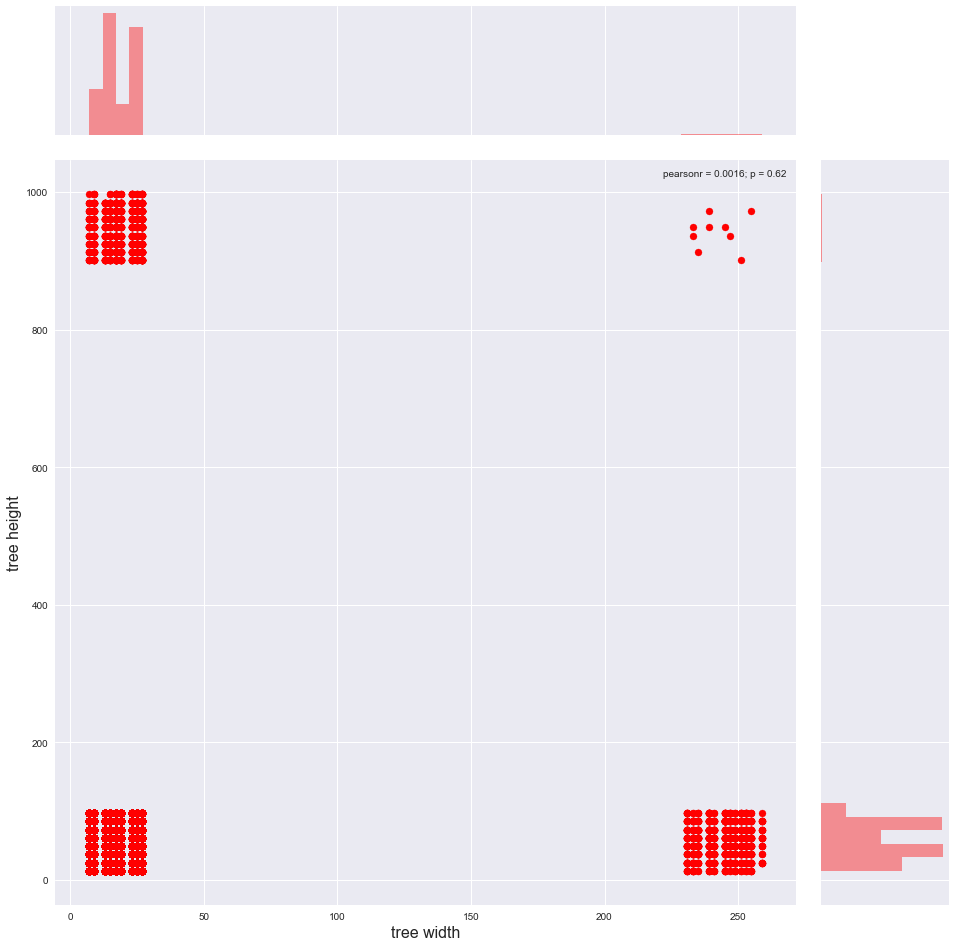

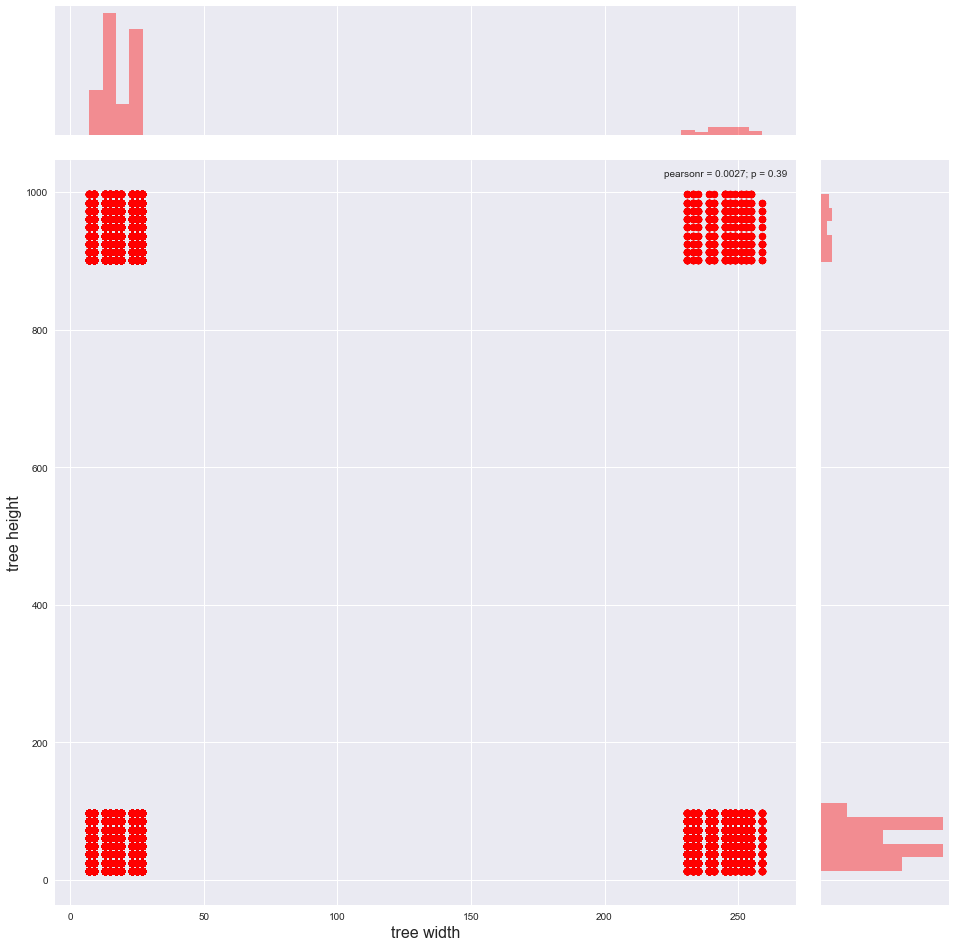

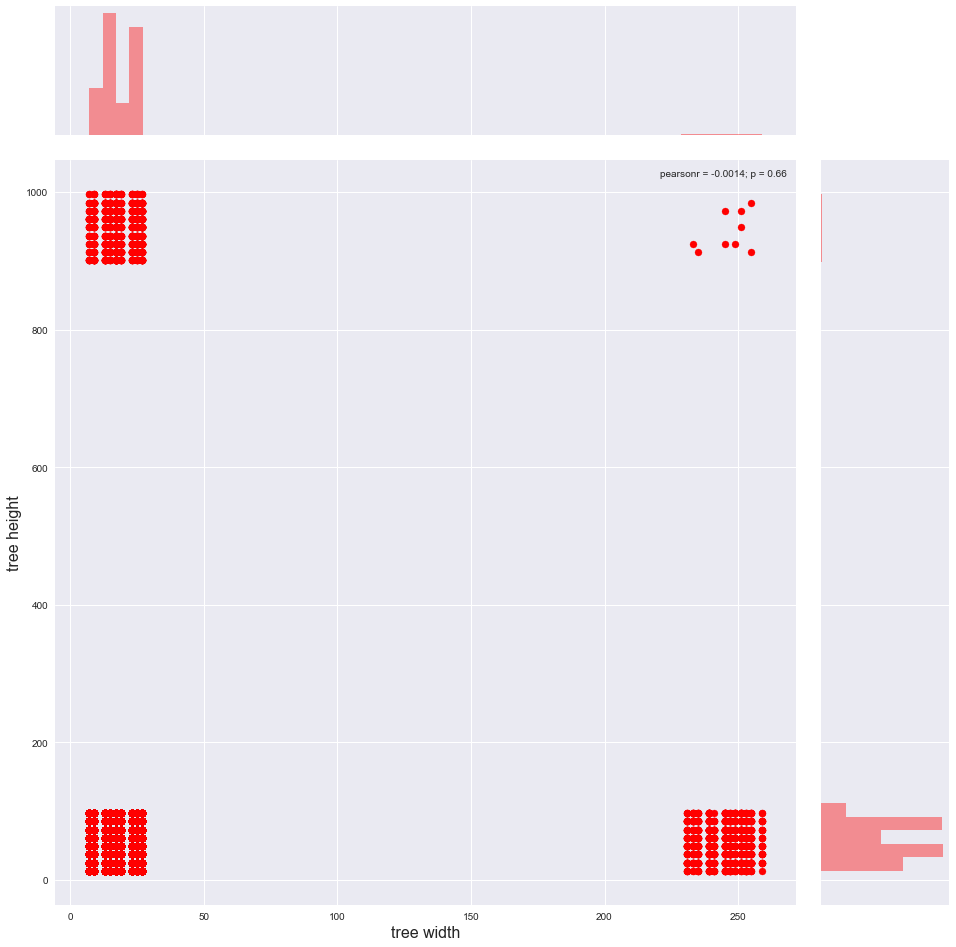

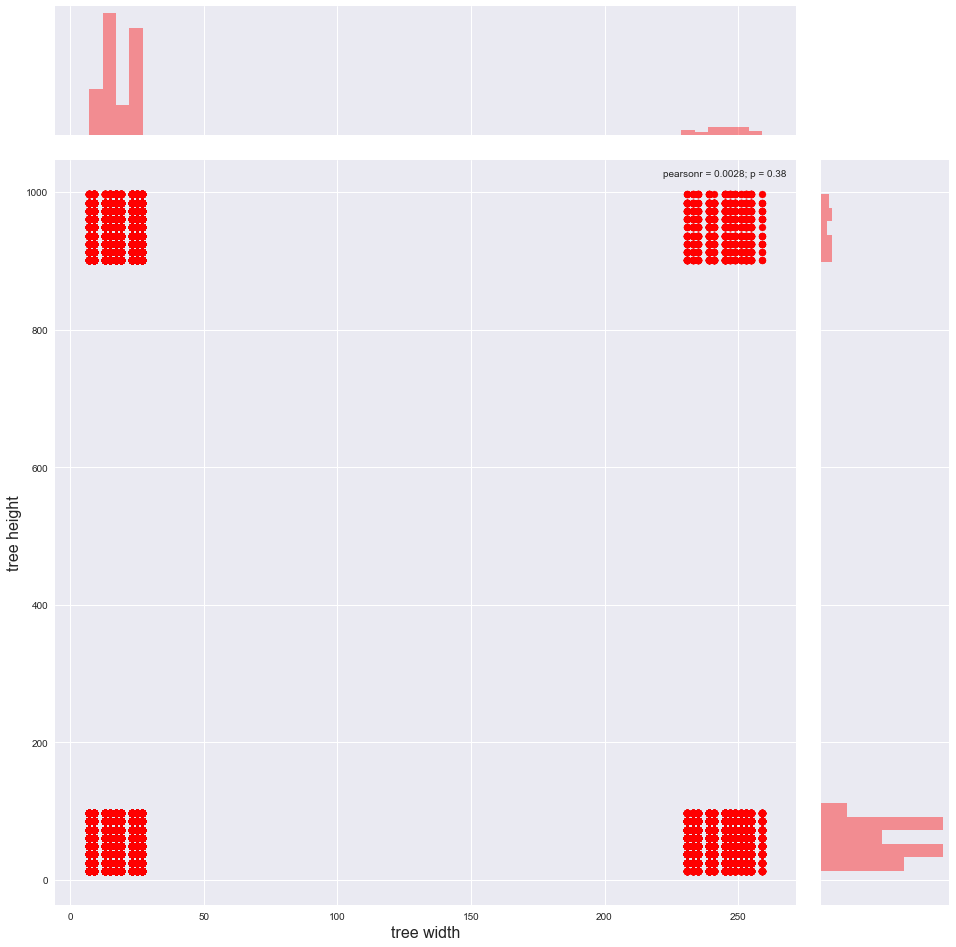

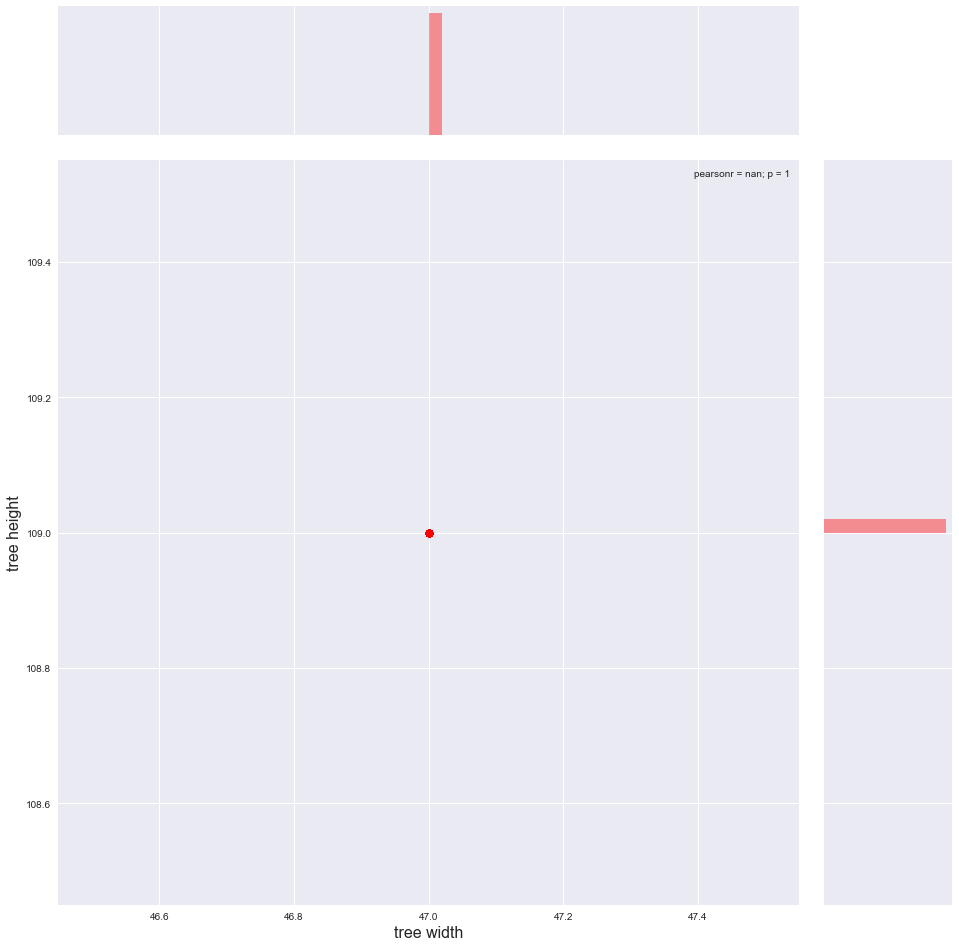

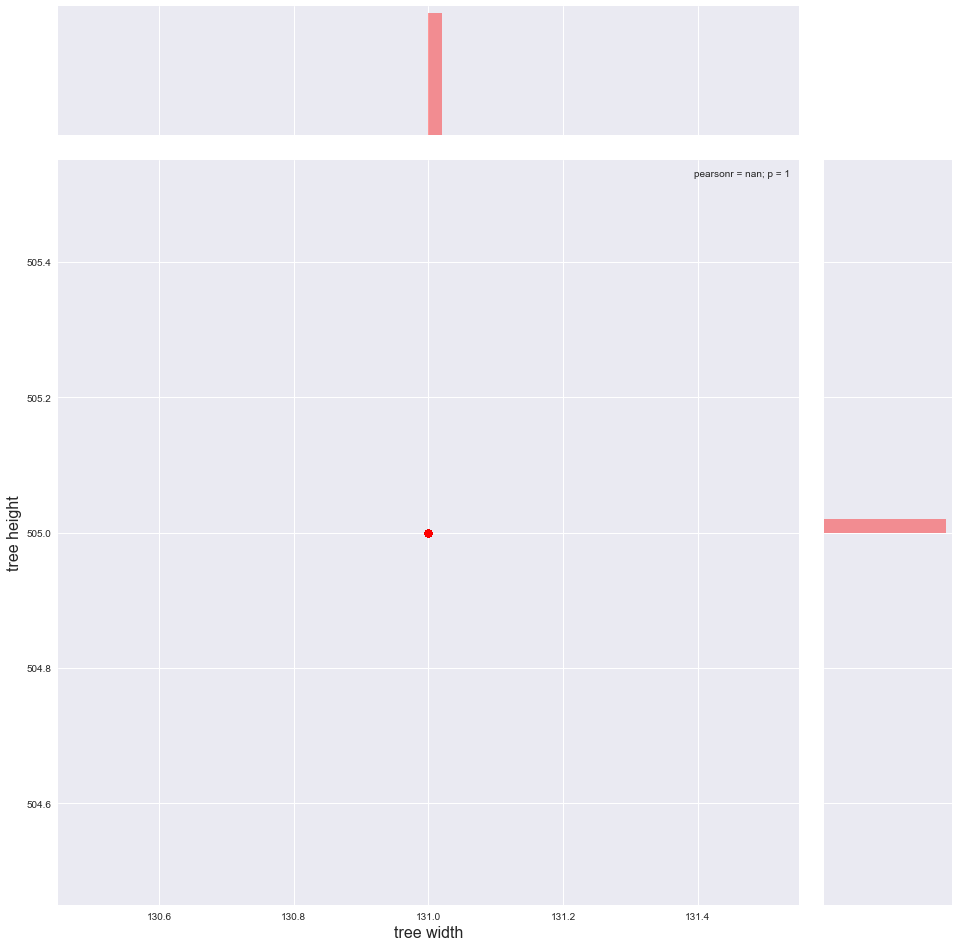

In [47]:
filenames = ["rand_h_unif_w_100000.in",
"rand_hw_100000.in",
"rand_w_unif_h_100000.in",
"skew_h_1_rand_w_100000.in",
"skew_h_10_rand_w_100000.in",
"skew_hw_1_100000.in",
"skew_hw_10_100000.in",
"skew_w_1_rand_h_100000.in",
"skew_w_10_rand_h_100000.in",
"unif_book_hw_100000.in",
"unif_hw_100000.in"]
filenames = list(map(lambda f: 'wmp/data/100000/' + f, filenames))
print_jointplots(filenames)
print_datainfo(filenames)